In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

           states     actions  uncertainty      sparse     tot_tests  \
count  995.000000  995.000000   995.000000  995.000000    995.000000   
mean    30.451256    6.081407    49.291457    0.520603  12928.643216   
std     11.805277    2.507214    17.648521    0.499827  10909.145135   
min     10.000000    2.000000    20.000000    0.000000    400.000000   
25%     20.000000    4.000000    33.000000    0.000000   4356.000000   
50%     31.000000    6.000000    49.000000    1.000000   9610.000000   
75%     40.000000    8.000000    64.000000    1.000000  19166.000000   
max     50.000000   10.000000    80.000000    1.000000  48020.000000   

            score  
count  995.000000  
mean     0.106351  
std      0.041561  
min      0.045153  
25%      0.077554  
50%      0.096241  
75%      0.124400  
max      0.338425  


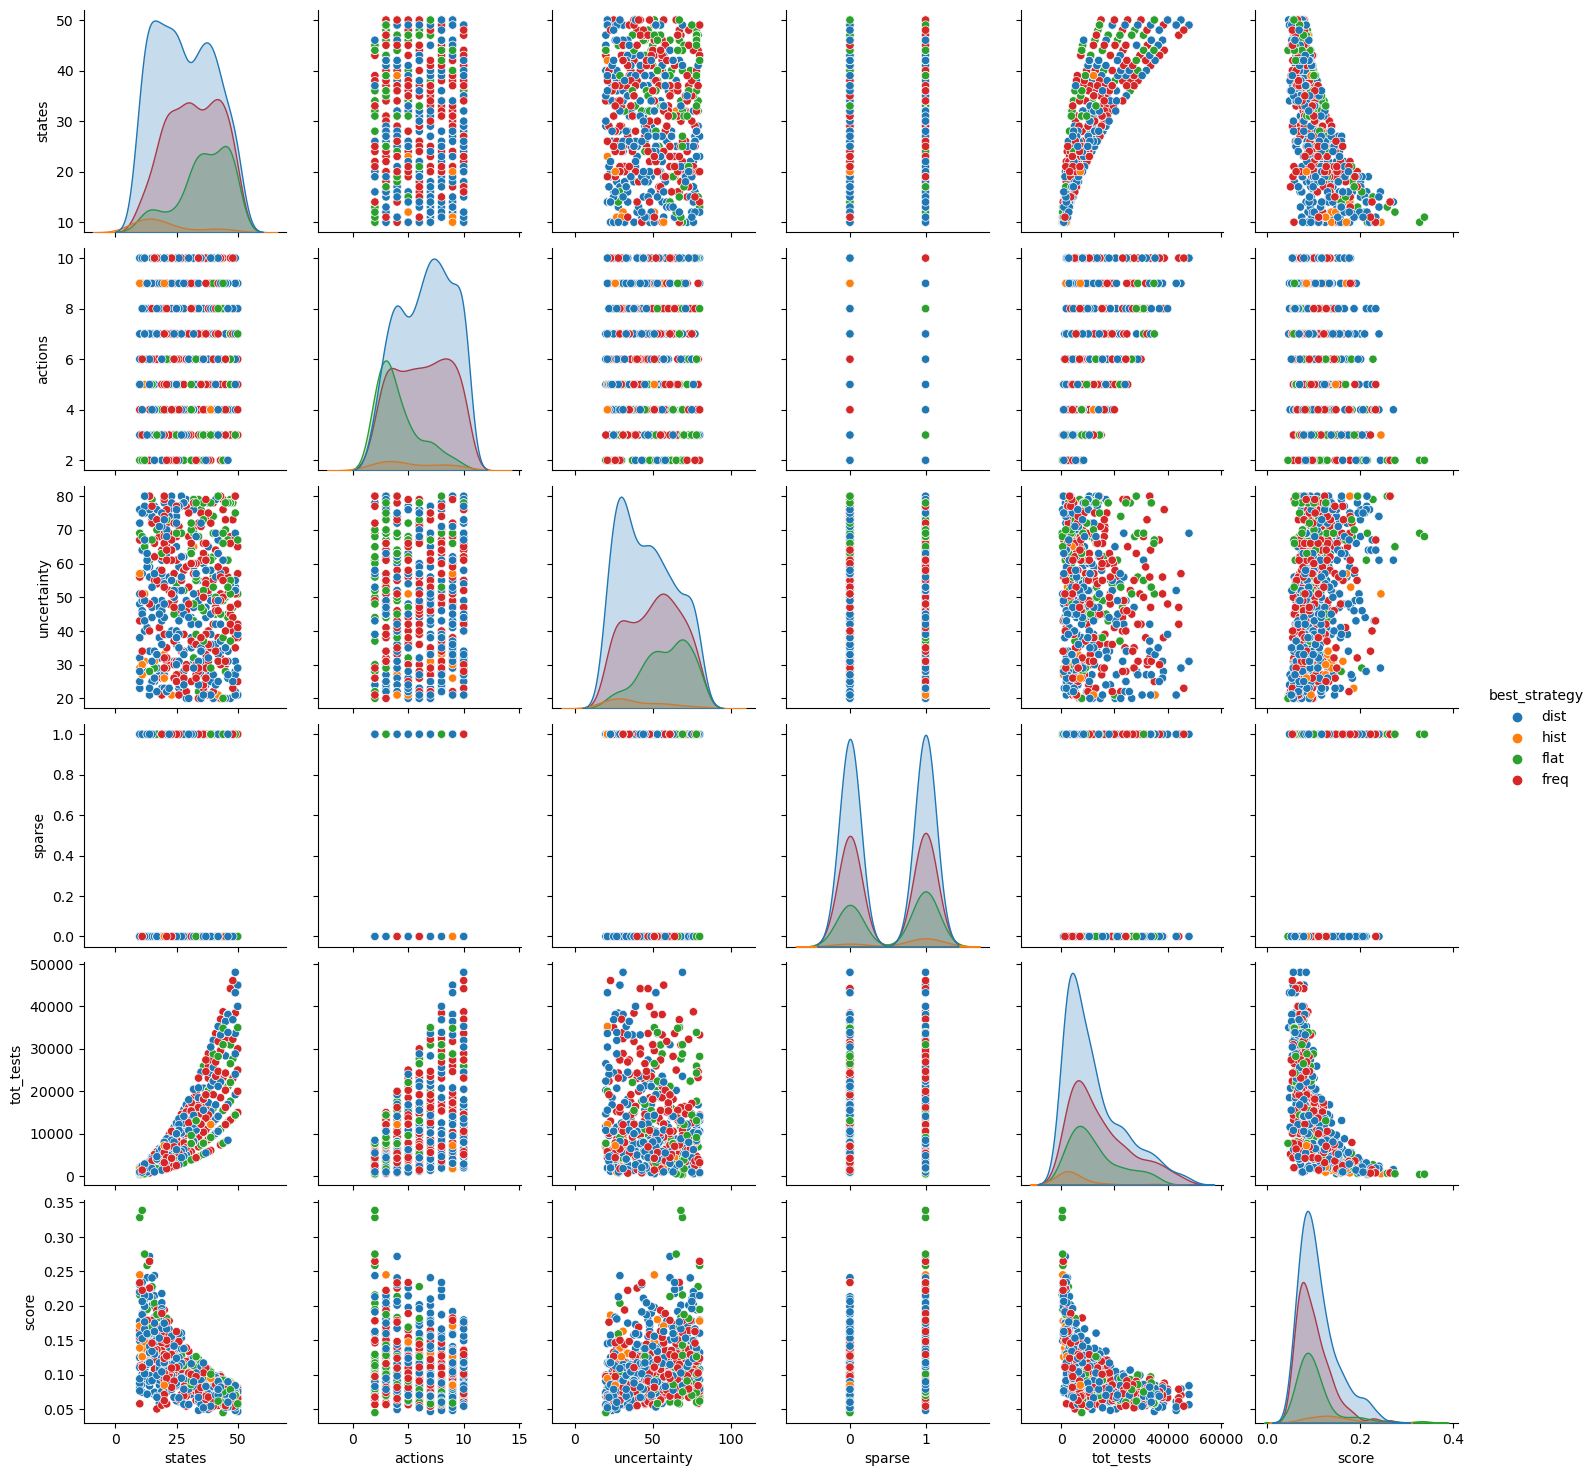

In [2]:
#df = pd.read_csv("balanced_dataset.csv")
df = pd.read_csv("dataset0.csv")

print(df.describe())

sb.pairplot(df, kind="scatter", hue="best_strategy")
plt.show()

In [3]:
#Decision Tree Model

from sklearn import tree
from sklearn.model_selection import train_test_split

# encode "bal" with 1, "unbal" with 0
for index, row in df.iterrows():
	if row["prior"] == "bal":
		df.loc[index,"prior"]=1
	elif row["prior"] == "unbal":
		df.loc[index,"prior"]=0



X = df[["states", "actions", "uncertainty", "sparse", "tot_tests", "prior"]]
#y = df[["dist","flat","freq","hist"]]
y = pd.get_dummies(df['best_strategy'])


#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify= y)




print(X)

clf = tree.DecisionTreeClassifier()
m1 = clf.fit(X_train,y_train)




     states  actions  uncertainty  sparse  tot_tests prior
0        23       10           80       0      10580     1
1        27        3           34       0       4374     0
2        19        5           61       0       3610     1
3        35        7           75       0      17150     0
4        50        9           57       1      45000     1
..      ...      ...          ...     ...        ...   ...
990      42        8           80       0      28224     0
991      21        8           64       0       7056     0
992      42        3           25       0      10584     1
993      46        8           27       0      33856     0
994      11        6           51       0       1452     0

[995 rows x 6 columns]


In [4]:
#Prediction 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

y_pred = m1.predict(X_test)
#print(y_pred)
#print("Score: ", m1.score(X_test, y_test))


print("Accuracy: not reliable because of unbalanced dataset  ",accuracy_score(y_test, y_pred))


plt.figure(figsize =(100,200))

plot_tree(m1, feature_names=X.columns, max_depth=4, filled=True)
plt.show()

Accuracy: not reliable because of unbalanced dataset   0.592964824120603


In [5]:
#Other metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.5907275193153347
Recall: 0.592964824120603
F1-score: 0.5908869677145017


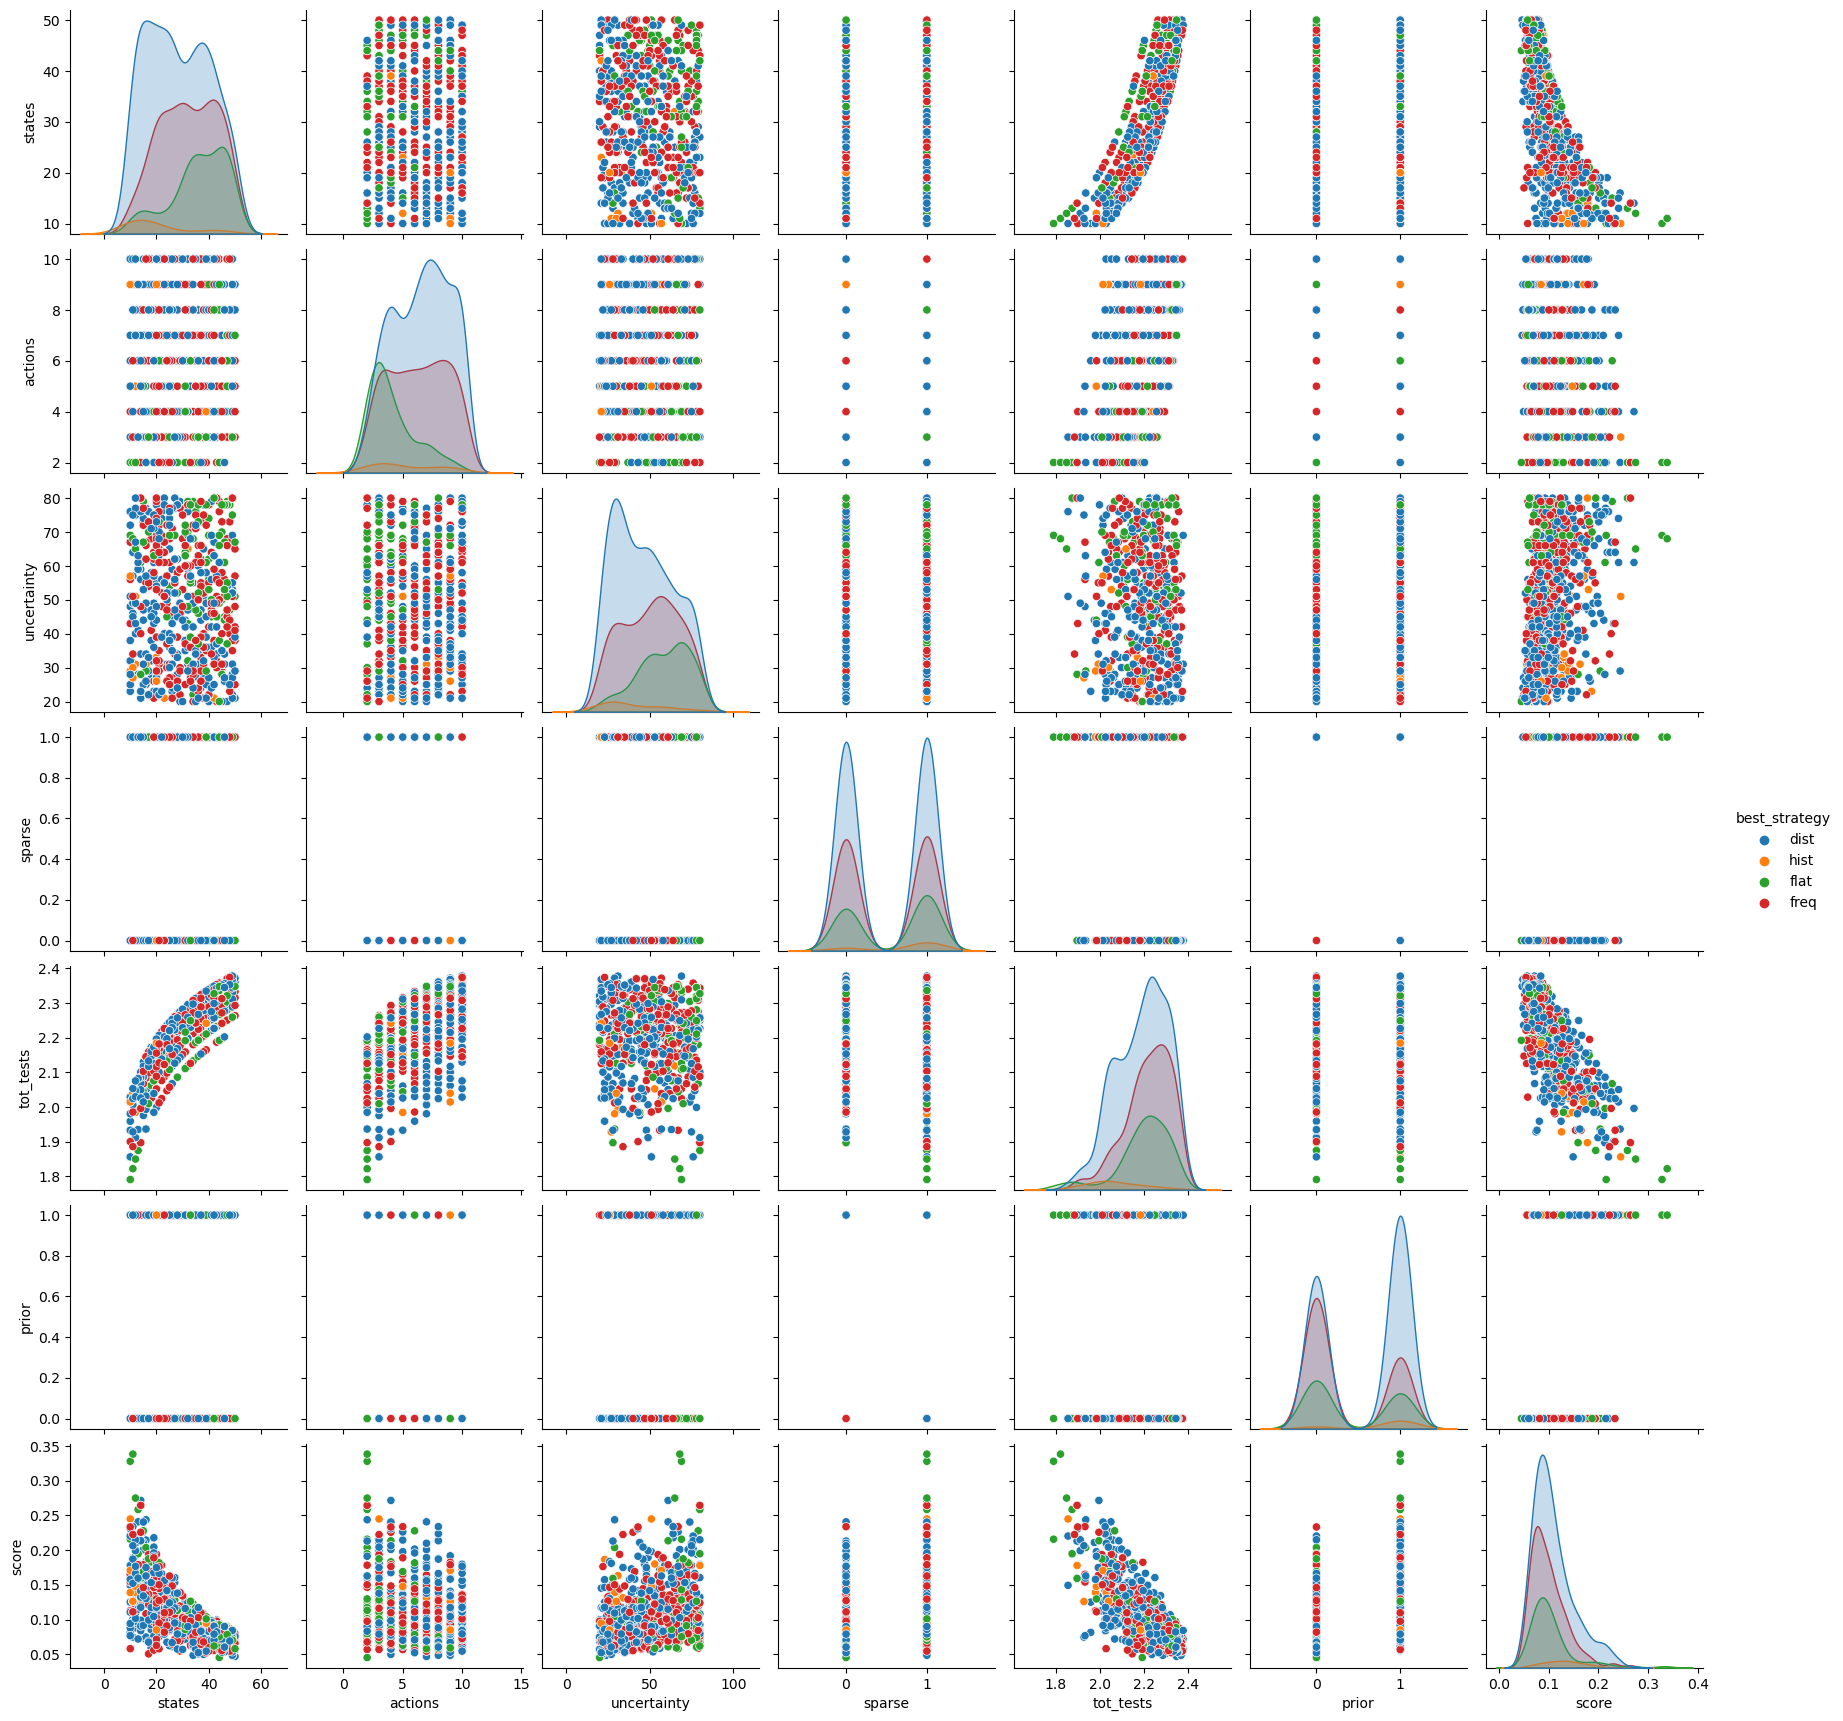

In [7]:
#feature engineering (log transformation)
df['tot_tests'] = np.log(df['tot_tests'])

sb.pairplot(df, kind="scatter", hue="best_strategy")
plt.show()


In [8]:
# model with transformed log(tot_tests)
X = df[["states", "actions", "uncertainty", "sparse", "tot_tests", "prior"]]
#y = df[["dist","flat","freq","hist"]]
y = pd.get_dummies(df['best_strategy'])

#Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify= y)

clf = tree.DecisionTreeClassifier()
m1 = clf.fit(X_train,y_train)


In [9]:
y_pred = m1.predict(X_test)
#print(y_pred)
#print("Score: ", m1.score(X_test, y_test))


print("Accuracy: not reliable because of unbalanced dataset  ",accuracy_score(y_test, y_pred))


plt.figure(figsize =(100,200))

plot_tree(m1, feature_names=X.columns, max_depth=4, filled=True)
plt.show()

Accuracy: not reliable because of unbalanced dataset   0.5226130653266332


In [10]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Confusion matrix
#conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.5222395589535549
Recall: 0.5226130653266332
F1-score: 0.5218476171219424
